In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes-vid.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,dead
1,1,85,66,29,0,26.6,0.351,31,alive
2,8,183,64,0,0,23.3,0.672,32,dead
3,1,89,66,23,94,28.1,0.167,21,alive
4,0,137,40,35,168,43.1,2.288,33,dead
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,alive
764,2,122,70,27,0,36.8,0.340,27,alive
765,5,121,72,23,112,26.2,0.245,30,alive
766,1,126,60,0,0,30.1,0.349,47,dead


Diabetes pedigree - function (DPF) calculates diabetes likelihood depending on the subject's age and his/her diabetic family history. Very little is known about the determinants of DPF for gestational diabetes mellitus (GDM) and normal women.

In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [7]:
df["Outcome"].value_counts()

alive    500
dead     268
Name: Outcome, dtype: int64

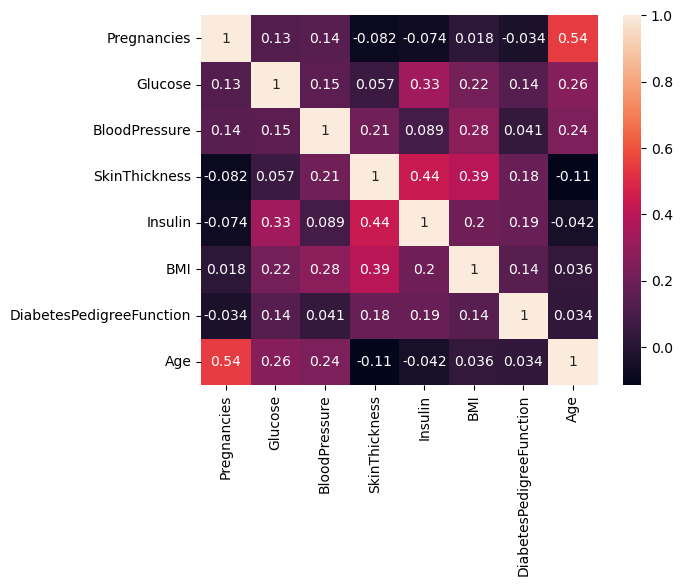

In [8]:
sns.heatmap(df.drop("Outcome", axis=1).corr(), annot=True);

##  Data Vizualization and analysis

<Axes: xlabel='Age', ylabel='Count'>

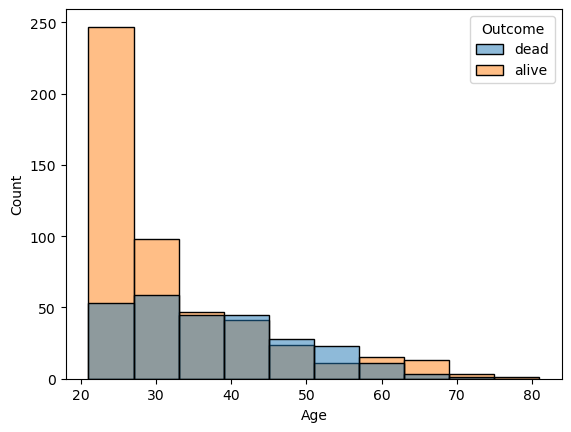

In [9]:
sns.histplot(data=df, x="Age", hue="Outcome", bins=10)

In [10]:
df[df["Age"]>35].value_counts().sum()

270

In [11]:
df[(df["Outcome"]=="dead") & (df["Age"]>35)].value_counts().sum()

137

In [12]:
(df[(df["Outcome"]=="dead") & (df["Age"]>35)].value_counts().sum()/df[df["Age"]>35].value_counts().sum()).round(2)

0.51

After 35 y.o only half of people are only alive

In [13]:
df[df["Age"]<=35].value_counts().sum()

498

In [14]:
df[(df["Outcome"]=="dead") & (df["Age"]<=35)].value_counts().sum()

131

In [15]:
(df[(df["Outcome"]=="dead") & (df["Age"]<=35)].value_counts().sum()/df[df["Age"]<=35].value_counts().sum()).round(2)

0.26

But before and in 35 y.o almost 3/4 of people are alive

Also as we can se we have nearly 2 times more people before and in the age of 35 than after that year

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

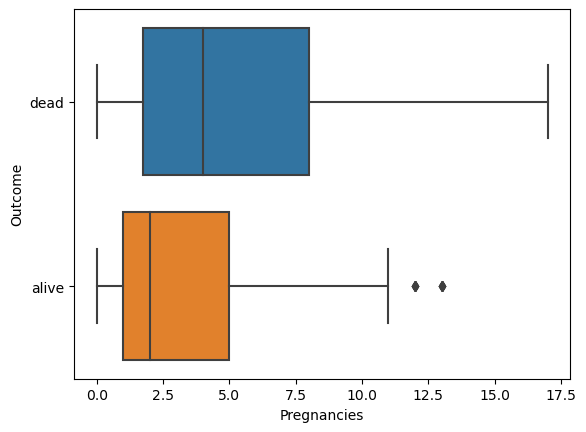

In [16]:
sns.boxplot(data=df, y="Outcome", x="Pregnancies")

<Axes: xlabel='Glucose', ylabel='Outcome'>

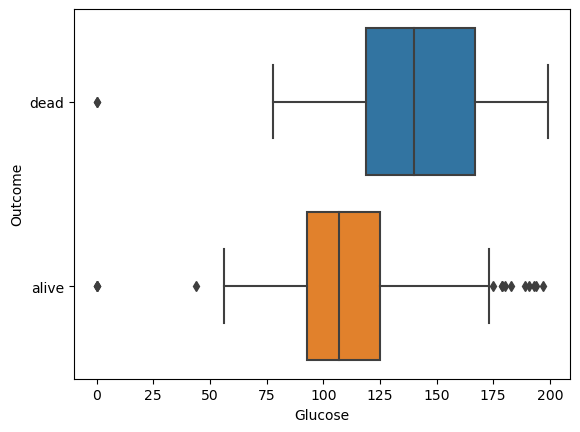

In [17]:
sns.boxplot(data=df, y="Outcome", x="Glucose")

<Axes: xlabel='BloodPressure', ylabel='Outcome'>

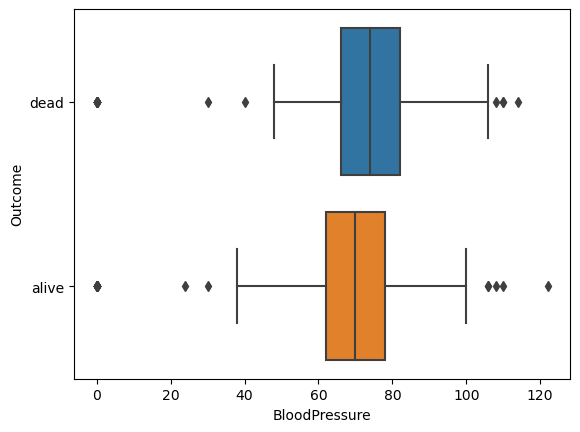

In [18]:
sns.boxplot(data=df, y="Outcome", x="BloodPressure")

<Axes: xlabel='SkinThickness', ylabel='Outcome'>

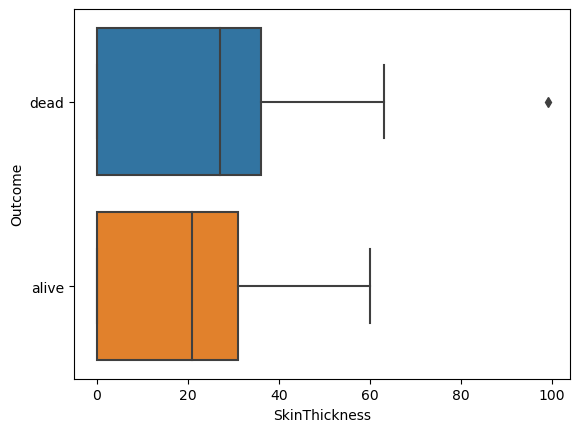

In [19]:
sns.boxplot(data=df, y="Outcome", x="SkinThickness")

<Axes: xlabel='Insulin', ylabel='Outcome'>

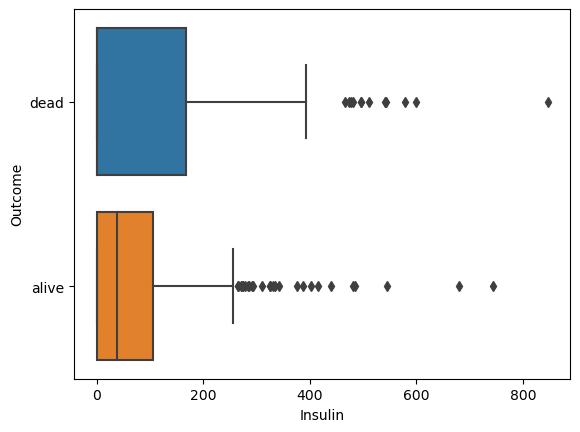

In [20]:
sns.boxplot(data=df, y="Outcome", x="Insulin")

<Axes: xlabel='BMI', ylabel='Outcome'>

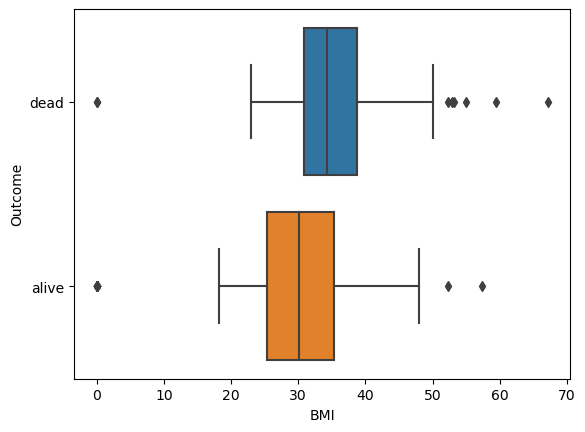

In [21]:
sns.boxplot(data=df, y="Outcome", x="BMI")

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Outcome'>

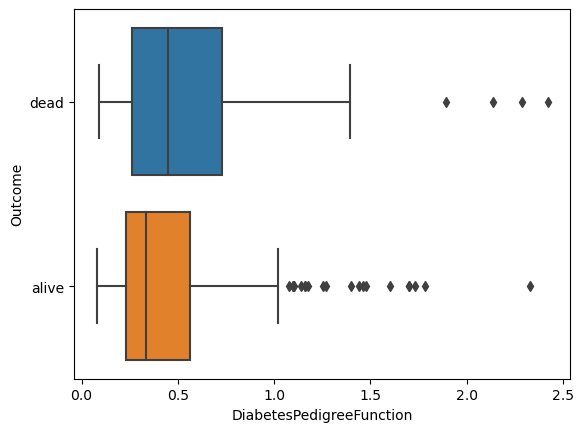

In [22]:
sns.boxplot(data=df, y="Outcome", x="DiabetesPedigreeFunction")

From now on, we can see that the most correlated characteristic is pregnancy with outcome and Glucose with outcome. Person with less glucose have greater chance to be alive.
If a woman has had fewer pregnancies the greater her chances to be alive

<Axes: xlabel='Glucose', ylabel='Count'>

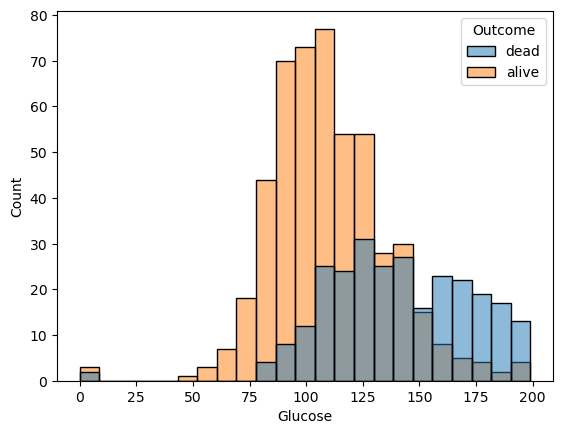

In [23]:
sns.histplot(data=df, x="Glucose", hue="Outcome")

<Axes: xlabel='Pregnancies', ylabel='count'>

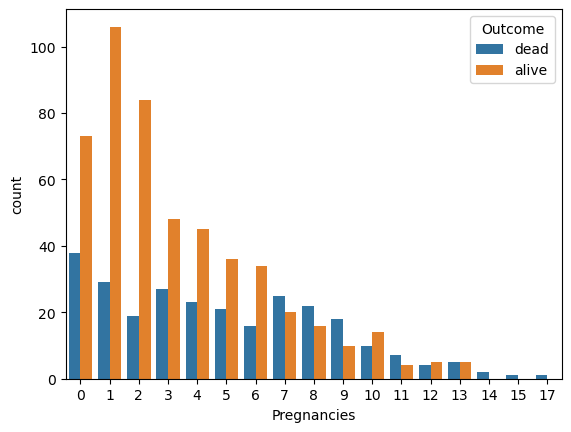

In [24]:
sns.countplot(data=df, x="Pregnancies", hue="Outcome")

## Data Cleaning

As you could see in the boxplots, some values are very outliers and it would be appropriate to get rid of them

A person cannot have bmi = 0 because it is impossible

In [25]:
df[df["BMI"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,dead
49,7,105,0,0,0,0.0,0.305,24,alive
60,2,84,0,0,0,0.0,0.304,21,alive
81,2,74,0,0,0,0.0,0.102,22,alive
145,0,102,75,23,0,0.0,0.572,21,alive
371,0,118,64,23,89,0.0,1.731,21,alive
426,0,94,0,0,0,0.0,0.256,25,alive
494,3,80,0,0,0,0.0,0.174,22,alive
522,6,114,0,0,0,0.0,0.189,26,alive
684,5,136,82,0,0,0.0,0.640,69,alive


With this condition there are also many empty values that will be cleared by the way

In [26]:
df = df.drop(df[df["BMI"]==0].index, axis=0)

<Axes: xlabel='BMI', ylabel='Outcome'>

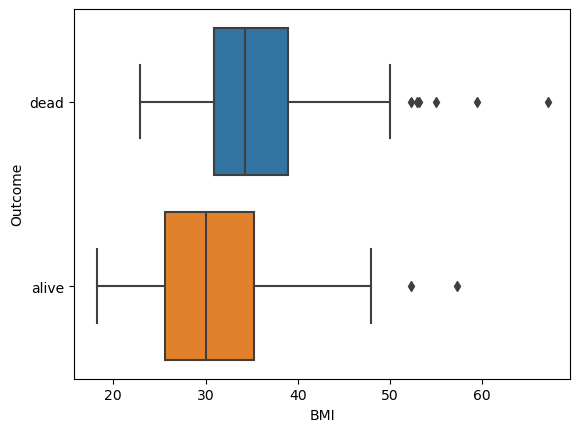

In [27]:
sns.boxplot(data=df, y="Outcome", x="BMI")

Removing points to far from iqr

Like alone point in SkinThickness

In [28]:
df = df.drop(df[df["SkinThickness"] > 70].index, axis=0)

Points when Insulin > 600

In [29]:
df = df.drop(df[df["Insulin"] > 600].index, axis=0)

Points when DiabetesPedigreeFunction > 2

In [30]:
df = df.drop(df[df["DiabetesPedigreeFunction"] > 2].index, axis=0)

Point when BMI > 60

In [31]:
df = df.drop(df[df["BMI"] > 60].index, axis=0)

Also the value 0 should be discarded from the Blood preasure  and Glucose column

In [32]:
df = df.drop(df[df["BloodPressure"] == 0].index, axis=0)

In [33]:
df = df.drop(df[df["Glucose"] == 0].index, axis=0)

Also should get rid of 2 data that have two values equal to 0 because it is already a big lack of data

In [34]:
df = df.drop(df[(df["Insulin"] == 0) & (df["SkinThickness"] == 0)].index, axis=0)

In [35]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,dead
1,1,85,66,29,0,26.6,0.351,31,alive
3,1,89,66,23,94,28.1,0.167,21,alive
6,3,78,50,32,88,31.0,0.248,26,dead
8,2,197,70,45,543,30.5,0.158,53,dead
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,dead
763,10,101,76,48,180,32.9,0.171,63,alive
764,2,122,70,27,0,36.8,0.340,27,alive
765,5,121,72,23,112,26.2,0.245,30,alive


In [36]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000
mean,3.551527,120.269084,71.452290,28.891221,110.929389,32.701908,0.489857,31.555344
std,3.320257,30.463879,12.162209,9.964257,112.571340,6.590174,0.309272,10.677382
min,0.000000,56.000000,24.000000,7.000000,0.000000,18.200000,0.085000,21.000000
25%,1.000000,98.000000,64.000000,21.000000,0.000000,27.800000,0.257750,23.000000
50%,2.000000,114.000000,72.000000,29.000000,90.000000,32.800000,0.413500,28.000000
75%,5.250000,140.000000,80.000000,36.000000,165.000000,36.800000,0.654250,38.000000
max,17.000000,199.000000,110.000000,60.000000,600.000000,57.300000,1.893000,81.000000


In [37]:
df["Outcome"].value_counts()

alive    353
dead     171
Name: Outcome, dtype: int64

## Data Vizualization on cleaned data

<Axes: xlabel='Age', ylabel='Count'>

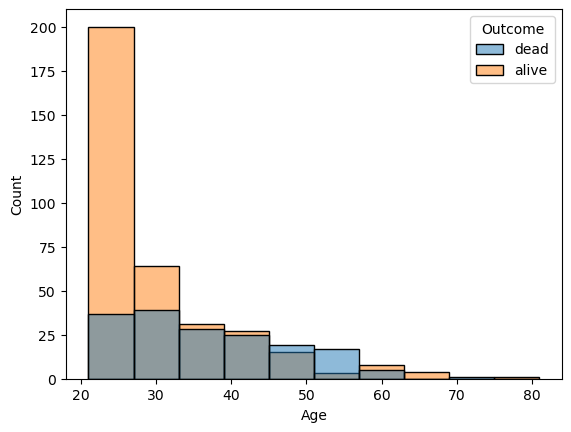

In [38]:
sns.histplot(data=df, x="Age", hue="Outcome", bins=10)

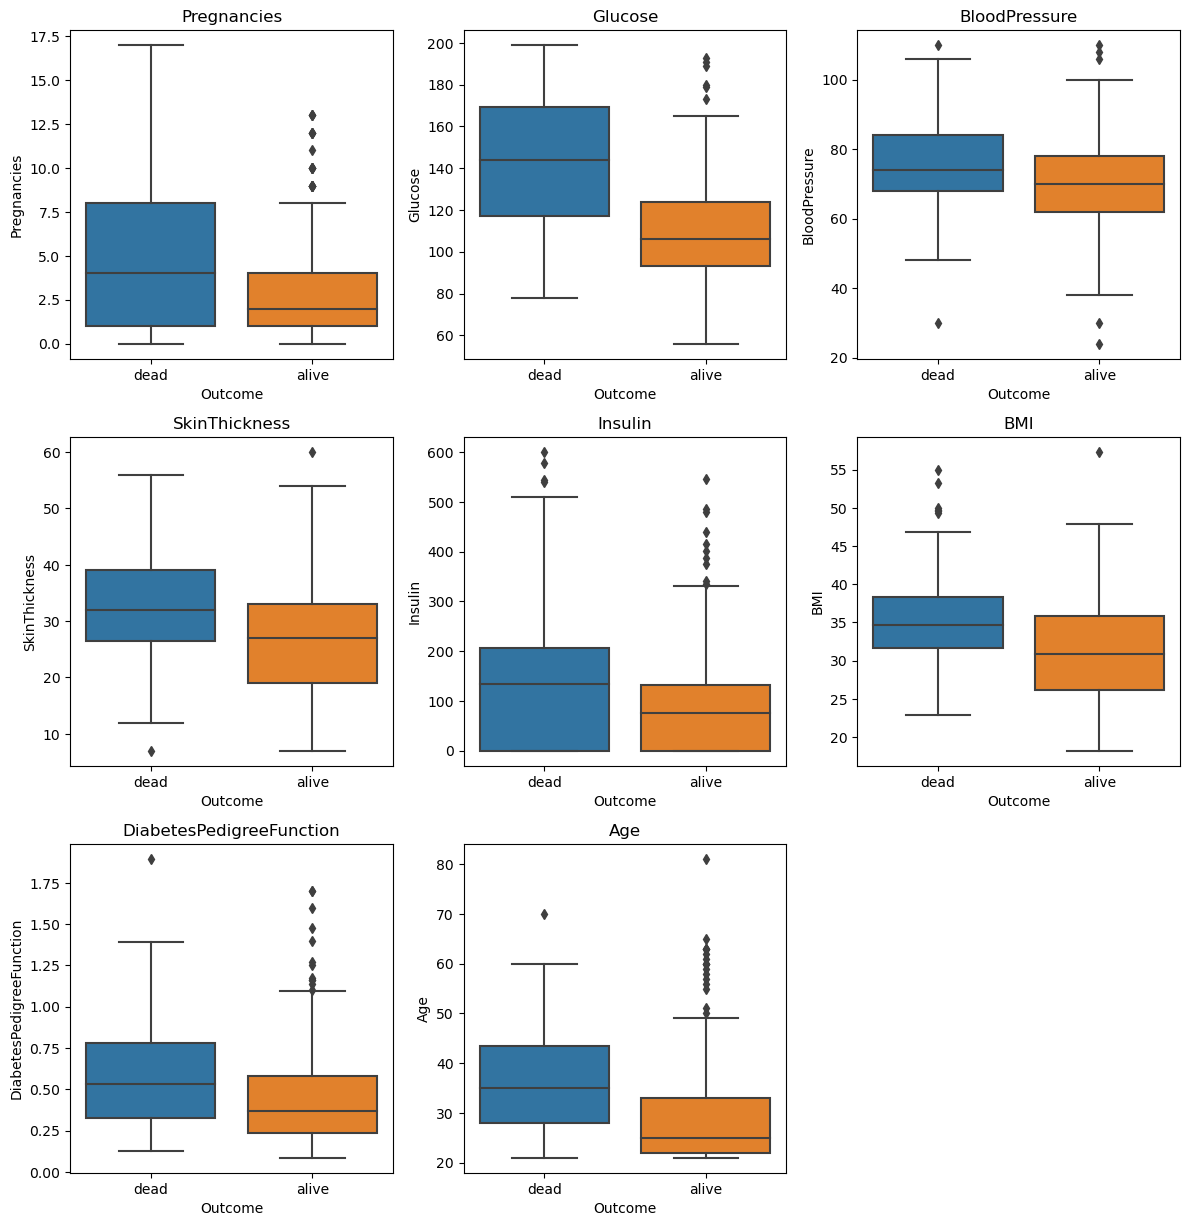

In [39]:
plt.figure(figsize=(12, 16))  

# Loop through each column and create a boxplot 
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        plt.subplot(4, 3, df.columns.get_loc(column) + 1)
        sns.boxplot(x=df["Outcome"], y=df[column])
        plt.title(column)

plt.tight_layout()
plt.show()

<Axes: xlabel='Pregnancies', ylabel='count'>

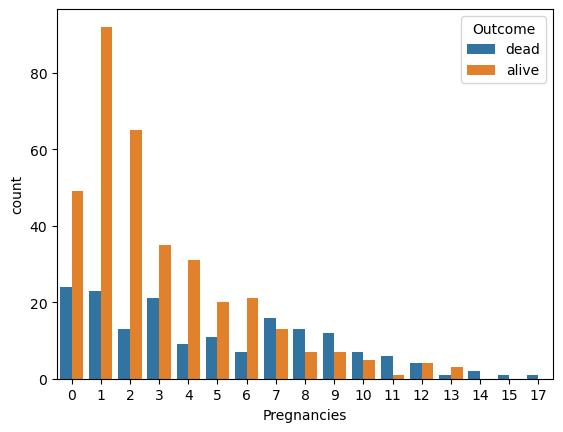

In [40]:
sns.countplot(data=df, x="Pregnancies", hue="Outcome")

<Axes: xlabel='Glucose', ylabel='Age'>

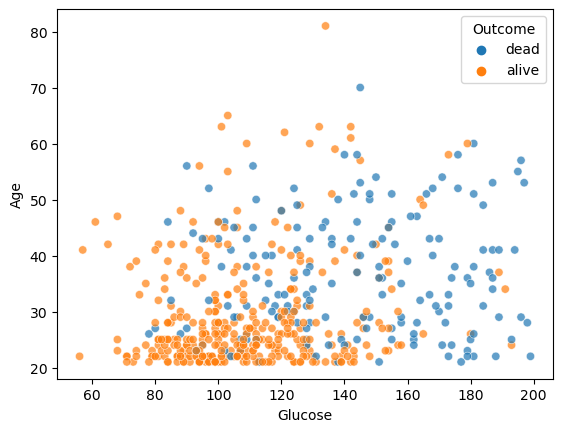

In [41]:
sns.scatterplot(data=df, y="Age", x="Glucose", hue="Outcome", alpha=0.7)

## Logistic Regression

In [42]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8)

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#

In [46]:
log_model = LogisticRegression(solver="saga", multi_class="ovr", max_iter=500)

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {"penalty": ["l1", "l2"], "C":np.logspace(-0.09, 1, 1000)}

In [49]:
gridLogR_model = GridSearchCV(log_model, param_grid=param_grid)

In [50]:
gridLogR_model.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=500, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([ 0.81283052,  0.81487518,  0.81692499,  0.81897996,  0.82104009,
        0.82310541,  0.82517592,  0.82725164,  0.82933258,  0.83141876,
        0.83351018,  0.83560687,  0.83770883,  0.83981608,  0.84192862,
        0.84404649,  0.84616968,  0.84829821,  0.85043209,  0.85257134,
        0.85471598,  0.856866...
        9.18127304,  9.20436843,  9.22752191,  9.25073364,  9.27400375,
        9.2973324 ,  9.32071974,  9.3441659 ,  9.36767104,  9.39123531,
        9.41485886,  9.43854183,  9.46228438,  9.48608664,  9.50994879,
        9.53387095,  9.5578533 ,  9.58189597,  9.60599912,  9.6301629 ,
        9.65438747,  9.67867297,  9.70301956,  9.7274274 ,  9.75189663,
        9.77642741,  9.80101991,  9.82567426,  9.85039063,  9.87516918,
        9.90001005,  9.92491342,  9.94987942,  9.97490823, 10.        ]),
                         'penalty': ['l1', 'l2']})

In [51]:
gridLogR_model.best_params_

{'C': 0.8128305161640993, 'penalty': 'l1'}

In [52]:
LogR_pred = gridLogR_model.predict(X_test)

In [53]:
from sklearn.metrics import  classification_report, ConfusionMatrixDisplay

In [54]:
print(classification_report(y_test, LogR_pred))

              precision    recall  f1-score   support

       alive       0.81      0.89      0.85        87
        dead       0.72      0.59      0.65        44

    accuracy                           0.79       131
   macro avg       0.77      0.74      0.75       131
weighted avg       0.78      0.79      0.78       131



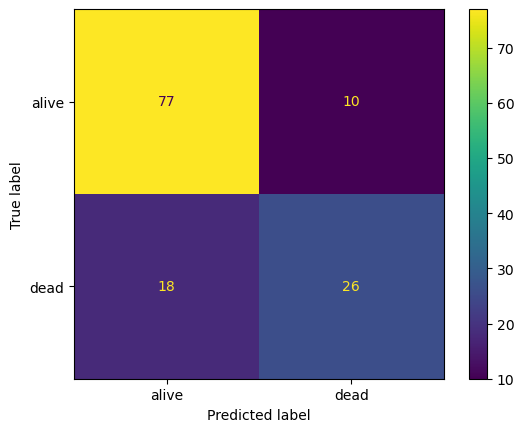

In [55]:
ConfusionMatrixDisplay.from_estimator(gridLogR_model, X_test, y_test)

## KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [57]:
knn = KNeighborsClassifier()

In [58]:
pipe = Pipeline([("scaler", scaler), ("knn", knn)])

In [59]:
k_values = list(range(1,30))
param_grid = {"knn__n_neighbors": k_values}

In [60]:
gridKNN_model = GridSearchCV(pipe, param_grid, cv=10, scoring="accuracy")

In [61]:
gridKNN_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [62]:
gridKNN_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=28))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=28),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 28,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [63]:
knn_pred = gridKNN_model.predict(X_test)

In [64]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

       alive       0.77      0.95      0.85        87
        dead       0.83      0.43      0.57        44

    accuracy                           0.78       131
   macro avg       0.80      0.69      0.71       131
weighted avg       0.79      0.78      0.76       131



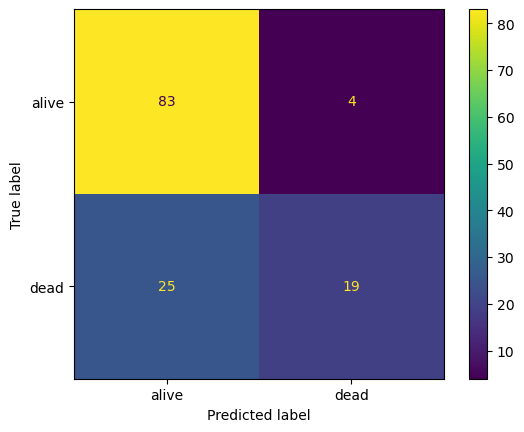

In [65]:
ConfusionMatrixDisplay.from_estimator(gridKNN_model, X_test, y_test)

## SVC

For the first need to create dummy variable of column Outcome

1-Dead, 0-Alive

In [66]:
df["Dead"] = pd.get_dummies(df["Outcome"], drop_first=True)
df = df.drop("Outcome",axis=1)

In [67]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Dead
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [68]:
X = df.drop("Dead", axis=1)
y = df["Dead"]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8)

In [70]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
from sklearn.svm import SVC

In [72]:
svc_model = SVC()

In [73]:
param_grid = {"C":[0.001, 0.01, 0.1, 0.5, 1, 2, 5], "kernel":["linear", "rbf", "poly"],
              "gamma":["scale", "auto"], "degree":[2,3]}

In [74]:
gridSVC_model = GridSearchCV(svc_model, param_grid=param_grid)

In [75]:
gridSVC_model.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 5],
                         'degree': [2, 3], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [76]:
gridSVC_model.best_params_

{'C': 0.01, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [77]:
svc_pred = gridSVC_model.predict(X_test)

In [78]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86        87
           1       0.79      0.52      0.63        44

    accuracy                           0.79       131
   macro avg       0.79      0.73      0.74       131
weighted avg       0.79      0.79      0.78       131



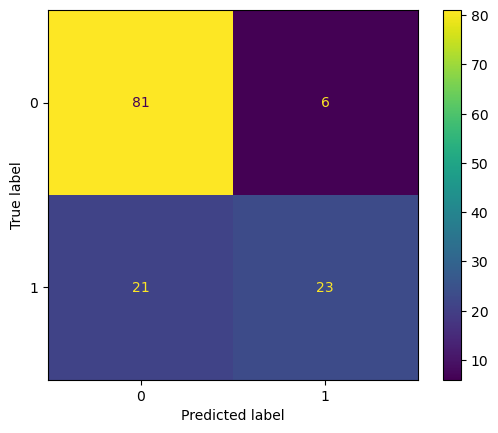

In [79]:
ConfusionMatrixDisplay.from_estimator(gridSVC_model, X_test, y_test)

#### What if we balance model?

In [80]:
svc_model_balanced = SVC(class_weight="balanced")

In [81]:
param_grid = {"C":[0.001, 0.01, 0.1, 0.5, 1, 2, 5], "kernel":["linear", "rbf", "poly"],
              "gamma":["scale", "auto"], "degree":[2,3]}

In [82]:
gridSVC_balanced_model = GridSearchCV(svc_model_balanced, param_grid=param_grid)

In [83]:
gridSVC_balanced_model.fit(X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 5],
                         'degree': [2, 3], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [84]:
gridSVC_balanced_model.best_params_

{'C': 0.5, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}

In [85]:
svc_balanced_pred = gridSVC_balanced_model.predict(X_test)

In [86]:
print(classification_report(y_test, svc_balanced_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        87
           1       0.72      0.59      0.65        44

    accuracy                           0.79       131
   macro avg       0.77      0.74      0.75       131
weighted avg       0.78      0.79      0.78       131



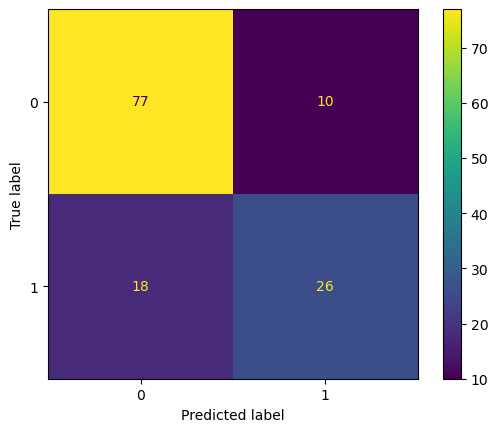

In [87]:
ConfusionMatrixDisplay.from_estimator(gridSVC_balanced_model, X_test, y_test)

Its look little better while its little more balanced

### Small Conclusion

First and last model (Logistic Regression and SVC) have the best accuracy = 79% but KNN only have 1% less than them.

The major problem is unbalanced dataset. There is much more alive people than dead and the model has less information to analyze.

As we can see model predict many people as dead when they are alive, because it things there should be balance between them.